# Uploading data:

We have uploaded Meme images in a webserver, we will call the zip file and unzip it.

In [28]:
!wget www.sanjay.ie/aditya/BACKUP.zip

--2022-07-27 23:04:11--  http://www.sanjay.ie/aditya/BACKUP.zip
Resolving www.sanjay.ie (www.sanjay.ie)... 81.16.28.117
Connecting to www.sanjay.ie (www.sanjay.ie)|81.16.28.117|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 377042 (368K) [application/zip]
Saving to: ‘BACKUP.zip’

BACKUP.zip          100%[===================>] 368.21K   359KB/s    in 1.0s    

2022-07-27 23:04:13 (359 KB/s) - ‘BACKUP.zip’ saved [377042/377042]



In [29]:
#Unzip the file which we called
!unzip /content/BACKUP.zip

Archive:  /content/BACKUP.zip
   creating: BACKUP/
   creating: BACKUP/Bagel/
  inflating: BACKUP/Bagel/bagel-1.jpg  
  inflating: BACKUP/Bagel/bagel-2.jpg  
  inflating: BACKUP/Bagel/bagel-3.jpg  
  inflating: BACKUP/Bagel/bagel-4.jpg  
  inflating: BACKUP/Bagel/bagel-5.jpg  
  inflating: BACKUP/Bagel/bagel-6.jpg  
  inflating: BACKUP/Bagel/bagel-7.jpg  
  inflating: BACKUP/Bagel/bagel-8.jpg  
   creating: BACKUP/BagelDog/
  inflating: BACKUP/BagelDog/dog-1.jpg  
  inflating: BACKUP/BagelDog/dog-2.jpg  
  inflating: BACKUP/BagelDog/dog-3.jpg  
  inflating: BACKUP/BagelDog/dog-4.jpg  
  inflating: BACKUP/BagelDog/dog-5.jpg  
  inflating: BACKUP/BagelDog/dog-6.jpg  
  inflating: BACKUP/BagelDog/dog-7.jpg  
  inflating: BACKUP/BagelDog/dog-8.jpg  
   creating: BACKUP/Chihuaha/
  inflating: BACKUP/Chihuaha/chihuahua-1.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-2.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-3.jpg  
  inflating: BACKUP/Chihuaha/chihuahua-4.jpg  
  inflating: BACKUP/Chihua

## Libraries used for the project:

In Google colab supports most of the Machine learning libraries available in the market since its based on python. For our project, we will just need to call the below libraries. 

In [30]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import keras
import seaborn as sns
import colorama
#Using below functions from imported libraries
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from IPython.display import Image
from colorama import Fore

#Setting seed 
np.random.seed(123)
#random.seed(123)


Setting up the stage with all directories where the images will be saved

In [31]:
# Setting up the directories which will be used later
path = '/content/BACKUP'
data_dir_1 = '/content/BACKUP'
savedir_1 = '/content/GeneratedImages/MEME'
ModelPath_1 = '/content/ModelImg/MEME'

#Creating the directories
os.mkdir('/content/GeneratedImages/')
os.mkdir('/content/ModelImg/')
os.mkdir(savedir_1)
os.mkdir(ModelPath_1)


The dataset images we got online is very small. For each class there is 8 images, hence there is a need of sampling more images for training the model. 

In [32]:
# Types of classes we want to differentiate
types = ["Bagel","BagelDog","Chihuaha","Muffin"]
nimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(data_dir_1,i)))
    nimgs[i]=nimages
print(nimgs)

{'Bagel': 8, 'BagelDog': 8, 'Chihuaha': 8, 'Muffin': 8}


## Image Data Generation

For these specific memes, we have 8 images per class, which is not enough for training the Model. Hence the image data generator feature from python is employed to create multiple images. Here will rotate, shift, increase/decrease height, rescale, zoom.

Using this the Image Data Generator can create hundreds of unique images.

In [33]:
datagen = ImageDataGenerator(
        rotation_range=50,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

def GenImage(origin,destination,types):
  for filename in types:
      directory = os.path.join(origin,filename)
      os.mkdir(os.path.join(destination,filename))
      for pic in os.listdir(directory):
          picture = os.path.join(directory, pic) 
          picuse = load_img(picture)
          pic_array = img_to_array(picuse)
          X = pic_array.reshape((1,) + pic_array.shape) # Converting into 4 dimension array
          count = 0
          for batch in datagen.flow(X, batch_size=1,save_to_dir=os.path.join(destination,filename), save_prefix=filename, save_format='jpeg'):
              count += 1
              if count > 201:
                  break

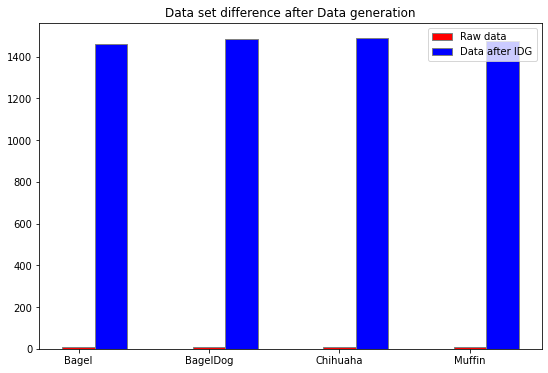

In [34]:
#Generating images here
GenImage(data_dir_1,savedir_1,types)

#Plotting the difference
nimgs = {}
genimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(data_dir_1,i)))
    nimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(savedir_1,i)))
    genimgs[i]=nimages

barWidth = 0.25
br1 = np.arange(len(nimgs))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(9, 6))
plt.bar(br1, list(nimgs.values()) , width = barWidth,
        edgecolor ='grey', color ='r', label ='Raw data')
plt.bar(br2,list(genimgs.values()), width = barWidth,
        edgecolor ='grey', color ='b', label ='Data after IDG')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Data set difference after Data generation')
plt.legend(loc="upper right")
plt.show()

After Image data generation there is a huge difference in samples now. All images are unique and is ready for training & testing images.

Since we have achieved this now, the data can be distributed as shown below into: 
60% =  Training set
20% = Validation set
20% = Test set

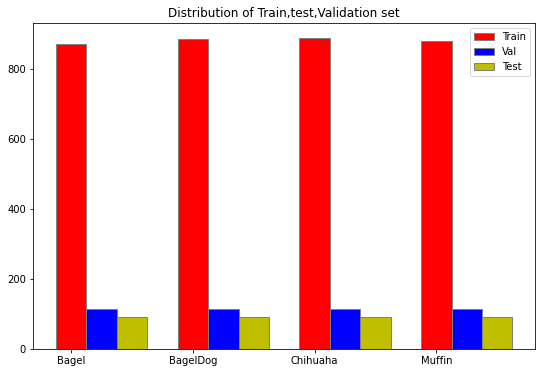

In [35]:
def datafolder(origin,destination,types,split,name):
  for filename in types:
    directory = os.path.join(origin,filename)
    os.mkdir(os.path.join(destination,name,filename))
    for img in np.random.choice(a=os.listdir(directory),
                                   size=(math.floor(split*len(os.listdir(directory)))-5),
                                   replace=False):
      O = os.path.join(directory,img)
      D = os.path.join(destination,name,filename)
      shutil.copy(O,D)
      os.remove(O)

os.mkdir(os.path.join(ModelPath_1,"train"))
datafolder(savedir_1,ModelPath_1,types,0.60,"train")
os.mkdir(os.path.join(ModelPath_1,"val"))
datafolder(savedir_1,ModelPath_1,types,0.20,"val")
os.mkdir(os.path.join(ModelPath_1,"test"))
datafolder(savedir_1,ModelPath_1,types,0.20,"test")
# Plotting the dataset
trainimgs = {}
valimgs = {}
testimgs = {}
for i in types:
    nimages = len(os.listdir(os.path.join(ModelPath_1,"train",i)))
    trainimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(ModelPath_1,"val",i)))
    valimgs[i]=nimages
    nimages = len(os.listdir(os.path.join(ModelPath_1,"test",i)))
    testimgs[i]=nimages
barWidth = 0.25
br1 = np.arange(len(nimgs))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(9, 6))
plt.bar(br1, list(trainimgs.values()) , width = barWidth,
        edgecolor ='grey', color ='r', label ='Train')
plt.bar(br2,list(valimgs.values()), width = barWidth,
        edgecolor ='grey', color ='b', label ='Val')
plt.bar(br3,list(testimgs.values()), width = barWidth,
        edgecolor ='grey', color ='y', label ='Test')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of Train,test,Validation set')
plt.legend(loc="upper right")
plt.show()

Displaying the images created and stored in training set.

Chihuaha_0_6847.jpeg
BagelDog_0_1064.jpeg
Chihuaha_0_5245.jpeg
BagelDog_0_6748.jpeg
Chihuaha_0_4679.jpeg
Chihuaha_0_5318.jpeg
Chihuaha_0_4305.jpeg
Chihuaha_0_3547.jpeg
Chihuaha_0_7147.jpeg
Bagel_0_4508.jpeg


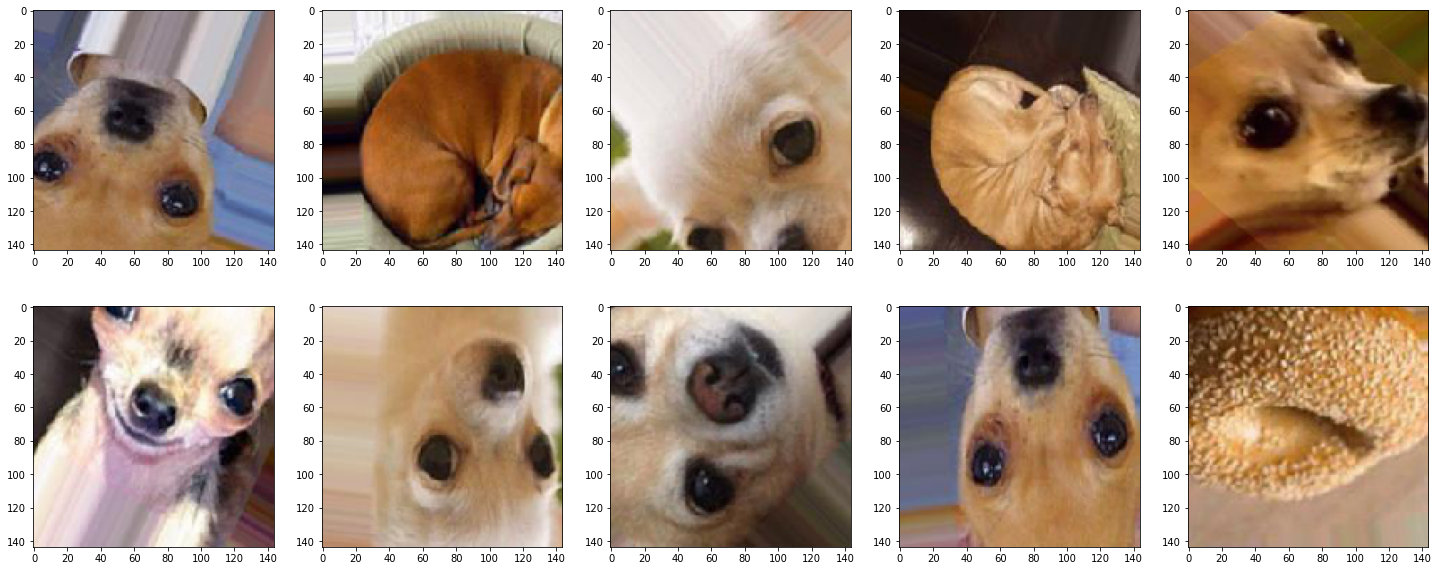

In [36]:
def Imgshow():
  type = random.choice(os.listdir(savedir_1))
  path  = os.path.join(savedir_1,type)
  randimg = random.choice(os.listdir(path))
  img = load_img(os.path.join(savedir_1,type,randimg), target_size=(144,144))
  input_arr = img_to_array(img)/255
  return(input_arr,randimg)
rows=2
cols = 5
show = 10
img_count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25,10))
names=[]
for i in range(rows):
    for j in range(cols):        
        if img_count < show:
            randomImages = Imgshow()
            img = randomImages[0]
            name = randomImages[1]
            axes[i, j].imshow(img)
            img_count+=1
            names.append(name)
for i in range(10):
  print(names[i])

## Creating Model :

In [37]:
ImageSize = 144
model = Sequential()
model.add(Conv2D(filters =16, kernel_size=(3,3), activation='relu', input_shape=(ImageSize,ImageSize,3) ))
model.add(Conv2D(filters =36, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 142, 142, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 140, 140, 36)      5220      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 70, 70, 36)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 68, 68, 64)        20800     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 34, 34, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 128)      

In [38]:
batch_size = 32
def preprocessomgImagesTrain(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1. / 255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size = (144,144), batch_size=batch_size, class_mode='categorical')
  return image

def preprocessomgImagesTest(path):
  image_data = ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1. / 255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path, target_size = (144,144), batch_size=batch_size, class_mode='categorical',shuffle = False)
  return image

#Compiling the model
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])


## Preprocessing Images:

Here the images are converted into array and stored in batches of 32.


In [39]:
path='/content/ModelImg/MEME/train'
train_Muffin= preprocessomgImagesTrain(path)

Found 3524 images belonging to 4 classes.


In [40]:
path='/content/ModelImg/MEME/val'
val_Muffin= preprocessomgImagesTest(path)

Found 457 images belonging to 4 classes.


In [41]:
path='/content/ModelImg/MEME/test'
test_Muffin= preprocessomgImagesTest(path)

Found 365 images belonging to 4 classes.


To reduce the time and increase the efficiency of the model we have introduced early stopping, wherein the validation accuracy is monitored and if the validation accuracy doesn't increase in 15 epochs, the model will be stopped. Also the best model is saved every iteration.

Epoch 1/100
16/16 [==============================] - 6s 340ms/step - loss: 1.4261 - accuracy: 0.2383 - val_loss: 1.3727 - val_accuracy: 0.2495
Epoch 2/100
16/16 [==============================] - 5s 311ms/step - loss: 1.3609 - accuracy: 0.2707 - val_loss: 1.2974 - val_accuracy: 0.4114
Epoch 3/100
16/16 [==============================] - 5s 343ms/step - loss: 1.2145 - accuracy: 0.3867 - val_loss: 1.1399 - val_accuracy: 0.4354
Epoch 4/100
16/16 [==============================] - 5s 315ms/step - loss: 1.0833 - accuracy: 0.4590 - val_loss: 1.0211 - val_accuracy: 0.5098
Epoch 5/100
16/16 [==============================] - 6s 375ms/step - loss: 1.1127 - accuracy: 0.4609 - val_loss: 0.9912 - val_accuracy: 0.5098
Epoch 6/100
16/16 [==============================] - 5s 319ms/step - loss: 1.0481 - accuracy: 0.5137 - val_loss: 0.8679 - val_accuracy: 0.6193
Epoch 7/100
16/16 [==============================] - 5s 317ms/step - loss: 0.9322 - accuracy: 0.5781 - val_loss: 0.7383 - val_accuracy: 0.6477

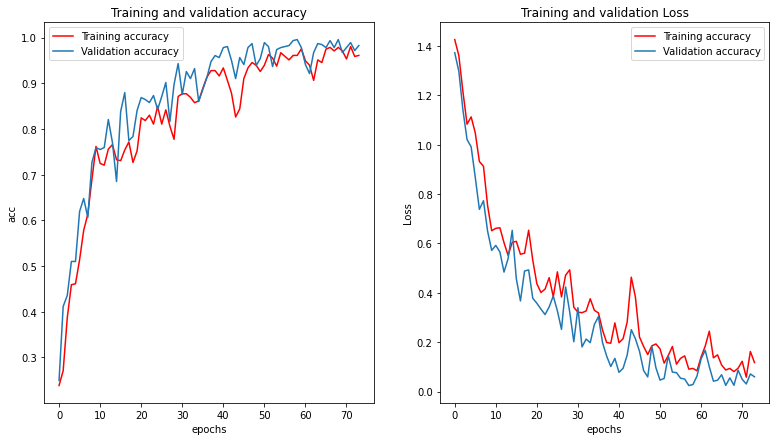

In [42]:
epochs=100
es = EarlyStopping(monitor="val_accuracy", patience=15, verbose = 1, mode="auto")
MuffinModel = ModelCheckpoint(filepath = "/content/model.h5", monitor = "val_accuracy", save_freq=epochs,  verbose=1, save_best_only = True)

cb = [es,MuffinModel]
M_model = model.fit_generator(generator=train_Muffin,
                              steps_per_epoch=16,
                              epochs=epochs,
                              verbose=1,
                              validation_data=val_Muffin,
                              callbacks=cb)
acc = M_model.history['accuracy']
val = M_model.history['val_accuracy']
loss = M_model.history['loss']
val_loss = M_model.history['val_loss']
epochs = range(len(acc))


fig, (a1,a2) = plt.subplots(1, 2, figsize=(13,7))
a1.plot(epochs, acc, 'r', label='Training accuracy')
a1.plot(epochs, val,label='Validation accuracy')
a1.set_xlabel('epochs')
a1.set_ylabel('acc')
a1.set_title('Training and validation accuracy')

a1.legend(loc="upper left")

a2.plot(epochs, loss, 'r', label='Training accuracy')
a2.plot(epochs, val_loss,label='Validation accuracy')
a2.set_xlabel('epochs')
a2.set_ylabel('Loss')
a2.set_title('Training and validation Loss')

a2.legend(loc="upper right")



Model Performance for training model:

In [43]:
print(f"the accuracy of meme model in Training is {max(M_model.history['accuracy'])}% ")

the accuracy of meme model in Training is 0.98046875% 


## Checking our model on Test Data: 

In [44]:

acc_m = model.evaluate_generator(test_Muffin)[1]
print(f"the accuracy of TESTING meme model is {acc_m*100}% ")


the accuracy of TESTING meme model is 98.08219075202942% 


Muffin
Bagel
Dog
Dog
Muffin
Bagel
Bagel
Dog
Chihuaha
Muffin


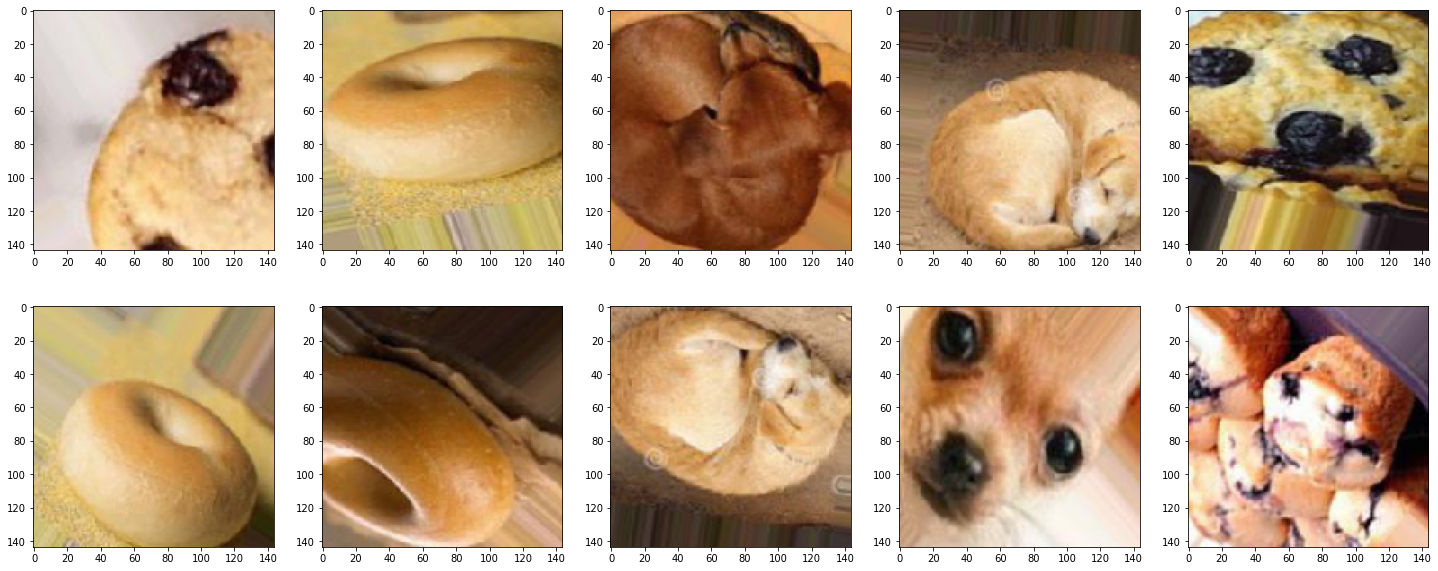

In [45]:

def predictImg():
  type = random.choice(os.listdir(savedir_1))
  path  = os.path.join(savedir_1,type)
  randimg = random.choice(os.listdir(path))
  img = load_img(os.path.join(savedir_1,type,randimg), target_size=(144,144))
  input_arr = img_to_array(img)/255
  return(input_arr)

rows=2
cols = 5
show = 10
img_count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25,10))
names=[]
for i in range(rows):
    for j in range(cols):        
        if img_count < show:
            img = predictImg()
            axes[i, j].imshow(img)
            img_count+=1
            img = np.expand_dims(img,axis=0)
            pred=model.predict(img) 
            if pred[0][0] == max(pred[0]):
              names.append('Bagel')
            if pred[0][1] == max(pred[0]):
              names.append('Dog')
            if pred[0][2] == max(pred[0]):
              names.append('Chihuaha')
            if pred[0][3] == max(pred[0]):
              names.append('Muffin')
for i in range(10):
  print(names[i])

In [46]:
mode = model.predict(test_Muffin)
answer = mode.argmax(axis=1)
print('Confusion Matrix')

mat = confusion_matrix(test_Muffin.classes, answer)
print(mat)
print('\n Classification Report')
print(classification_report(test_Muffin.classes, answer, target_names=types))

Confusion Matrix
[[88  2  0  0]
 [ 0 92  0  0]
 [ 0  0 87  5]
 [ 0  0  2 89]]

 Classification Report
              precision    recall  f1-score   support

       Bagel       1.00      0.98      0.99        90
    BagelDog       0.98      1.00      0.99        92
    Chihuaha       0.98      0.95      0.96        92
      Muffin       0.95      0.98      0.96        91

    accuracy                           0.98       365
   macro avg       0.98      0.98      0.98       365
weighted avg       0.98      0.98      0.98       365



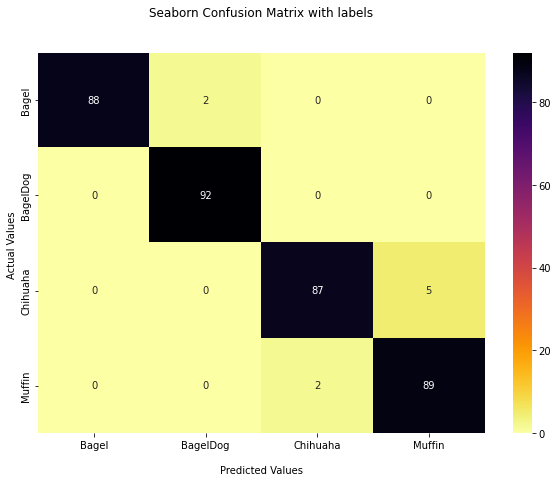

In [47]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(mat, annot=True, cmap='inferno_r')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(types)
ax.yaxis.set_ticklabels(types)

## Display the visualization of the Confusion Matrix.
plt.show()

## GUI to test the Model:

Upload an image from the meme and it will give the prediction

Saving chihuahua-5.jpg to chihuahua-5.jpg


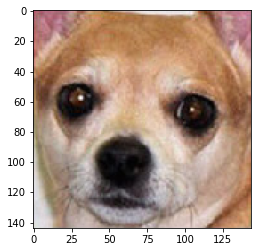



                            I think its 99.98830556869507% Chihuaha Dog                             


In [61]:
uploaded = files.upload()

def ImageName(uploaded):
  for fn in uploaded.keys():
    picname = fn
    return picname


pic_name = ImageName(uploaded)

from keras.preprocessing.image import load_img, img_to_array
path = os.path.join('/content',pic_name)
img = load_img(path, target_size=(144,144))

input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()


input_arr = np.expand_dims(input_arr,axis=0)
#pred = model.predict_classes(input_arr)
pred=model.predict(input_arr) 
classes_x=np.argmax(input_arr,axis=1)
prob = str(max(pred[0])*100)
print('\n')
if pred[0][0] == max(pred[0]):
  print(Fore.RED + ("I think its "+ prob +"% Bagel").center(100))
if pred[0][1] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob + "% Dog looking like Bagel").center(100))
if pred[0][2] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob +"% Chihuaha Dog").center(100))
if pred[0][3] == max(pred[0]):
  print(Fore.RED + ("I think its " + prob +"% Muffin").center(100))